Importing the necessary libraries:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report


Reading the data

In [70]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4240, 16)

This gives review of non-null values count,columns and datatype of the feature 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Total number of missing values 

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.duplicated().sum()

0

we can see that there are no duplicate values.

In [7]:
df['glucose'].mode()[0]

75.0

In [8]:
df['glucose'].fillna((df['glucose'].mode()[0]),inplace=True) #filling null values with mode 

Glucose is having more number of missing values so instead of dropping the feature.Filling it with mode value 75.

In [9]:
df.dropna(inplace=True)
df.isnull().sum()    

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Dropped all other rows with consisting of missing values.

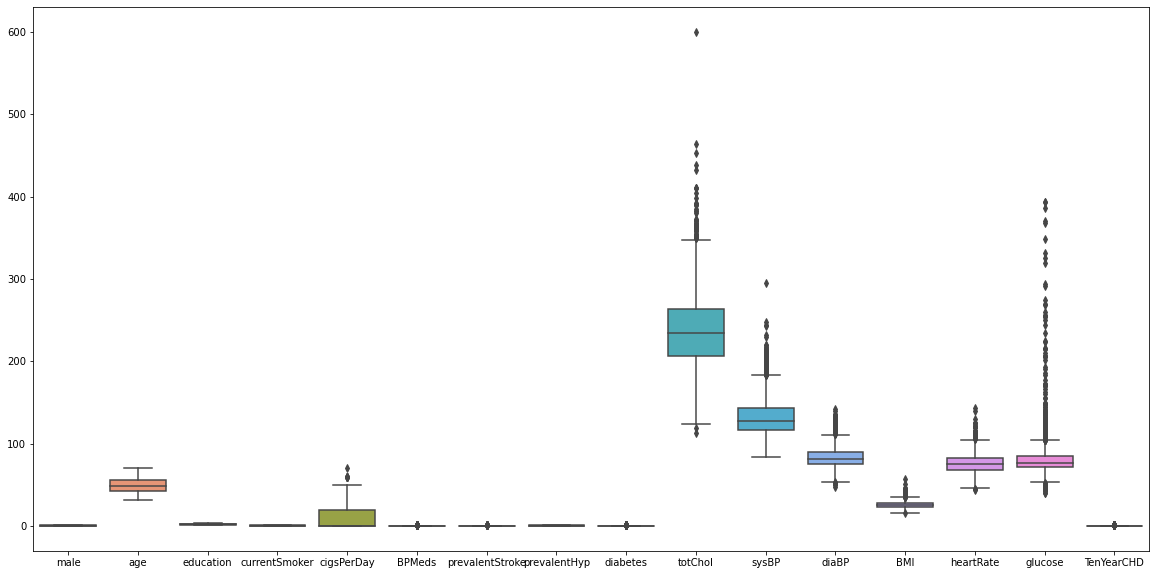

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

Outliers in numerical features cannot be removed . But in totchol and SysBp we can observe there are removalbe outliers.

In [11]:
df.totChol.max()

600.0

In [12]:
df.sysBP.max()

295.0

The outlier present in totChol and sysBp are 600 and 295.

In [13]:
df.shape

(3989, 16)

In [14]:
df= df[df['totChol']<600.0]
df = df[df['sysBP']<295.0]
df.shape

(3987, 16)

We have removed our missing values ,duplicates and also outliers.
Now lets perform EDA

### Exploratory Data Analysis

In [15]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,1.982694,0.491347,9.027840,0.029345,0.005518,0.309255,0.025082,236.502132,132.177452,82.849887,25.769488,75.869325,81.272385,0.148733
std,0.495608,8.531325,1.020832,0.499988,11.918332,0.168794,0.074087,0.462244,0.156392,43.653337,21.793408,11.854644,4.075145,12.086398,22.954842,0.355870
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


It shows the Mean , Standard Deviation and other statistical measures of the dataset

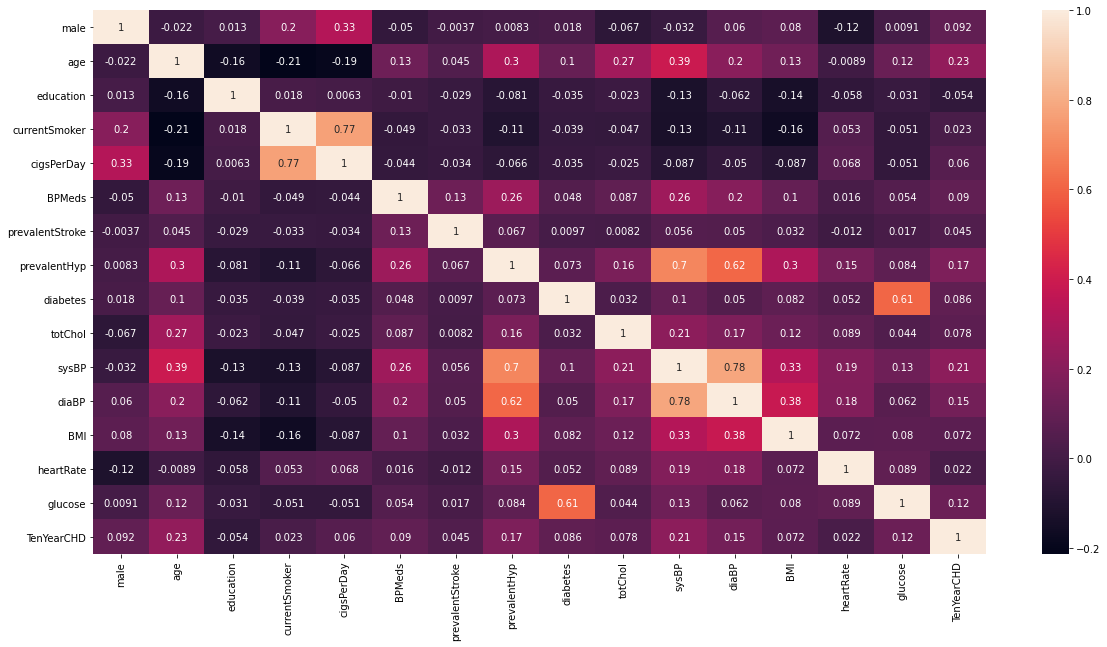

In [17]:
plt.figure(figsize=(20,10),facecolor='w')
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)


Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negative.

#### Univariate Analysis 

CATEGORICAL FEATURES :

In [18]:
C_features=['male','education', 'currentSmoker','BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
C_features

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

In [19]:
for item in C_features:
    print(item,':')
    print(df[item].value_counts())
    print('*****************************')

male :
0    2259
1    1728
Name: male, dtype: int64
*****************************
education :
1.0    1653
2.0    1209
3.0     666
4.0     459
Name: education, dtype: int64
*****************************
currentSmoker :
0    2028
1    1959
Name: currentSmoker, dtype: int64
*****************************
BPMeds :
0.0    3870
1.0     117
Name: BPMeds, dtype: int64
*****************************
prevalentStroke :
0    3965
1      22
Name: prevalentStroke, dtype: int64
*****************************
prevalentHyp :
0    2754
1    1233
Name: prevalentHyp, dtype: int64
*****************************
diabetes :
0    3887
1     100
Name: diabetes, dtype: int64
*****************************


In [20]:
for x,y in enumerate(C_features):
    print(x,y,":")

0 male :
1 education :
2 currentSmoker :
3 BPMeds :
4 prevalentStroke :
5 prevalentHyp :
6 diabetes :


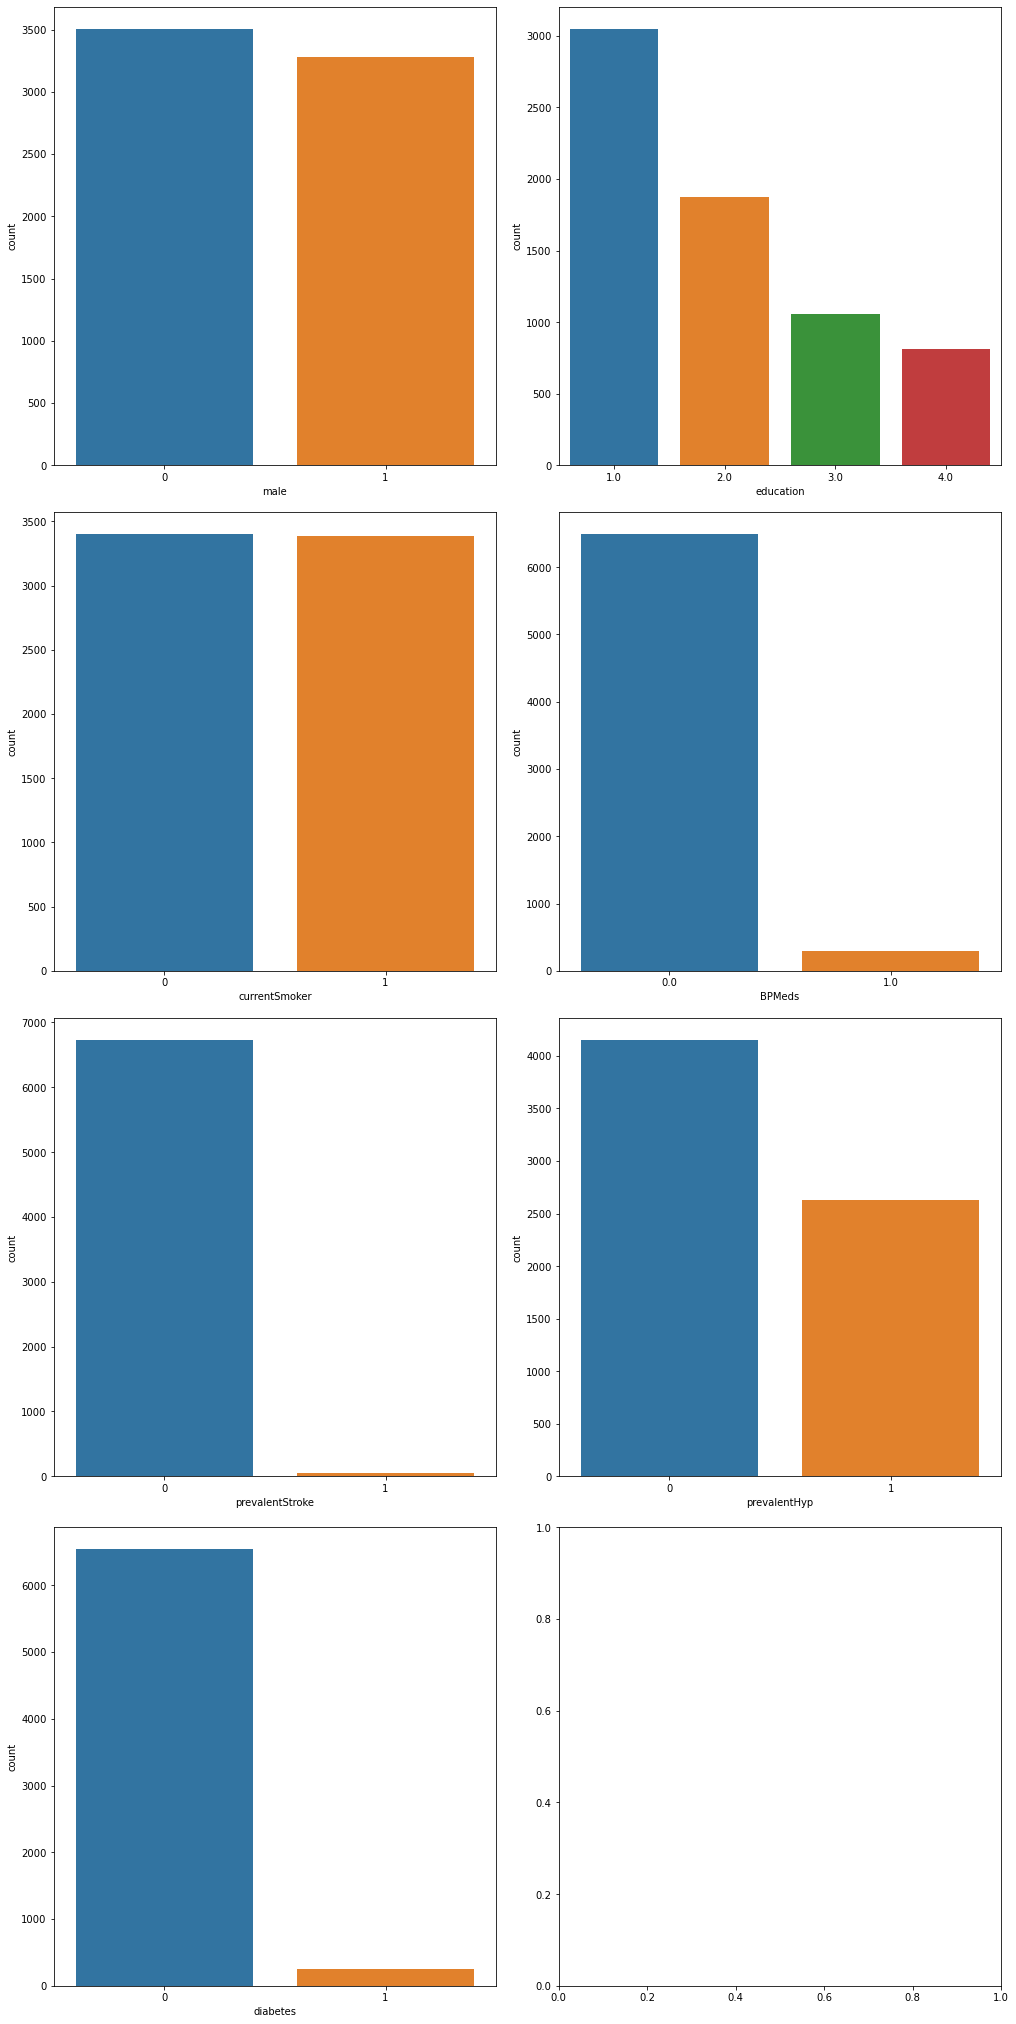

In [54]:
graphs = len(C_features)
total_cols = 2
total_rows = graphs//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(C_features):
    row = i//total_cols
    pos = i % total_cols
    
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

#### From the above plots:
#### 1) The total number of smokers and non smokers is almost same.
#### 2) There are four levels in education ,rest all are binary
#### 3) prevalentStroke ,bpMeds, Diabetes are highly imbalnced

NUMERICAL FEATURES :

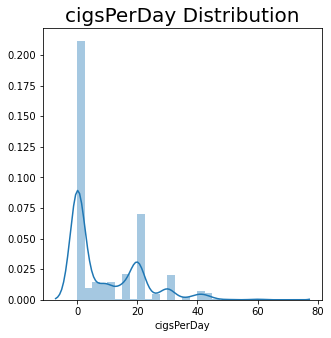

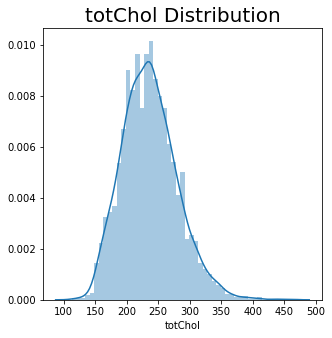

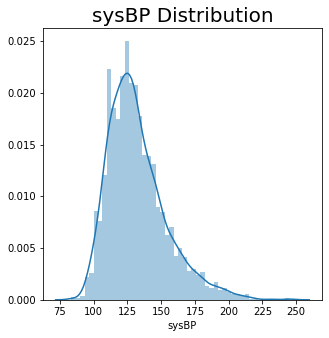

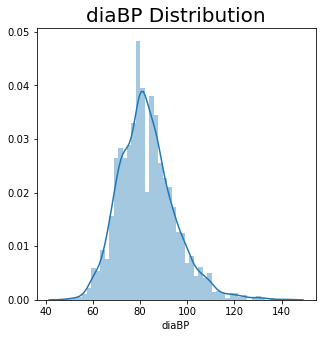

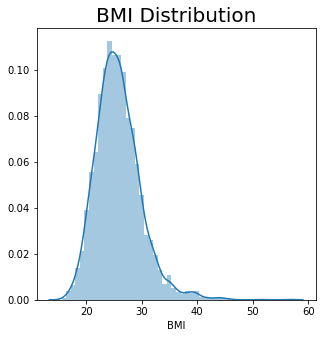

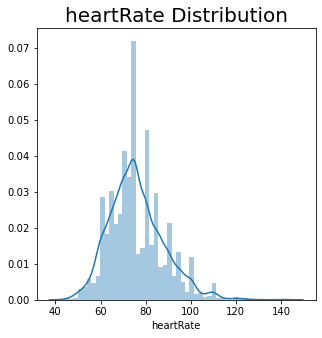

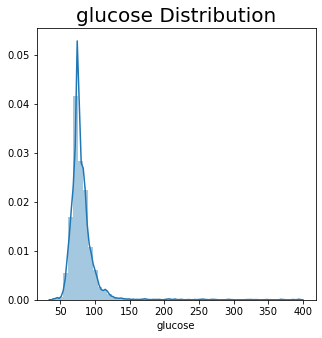

In [22]:
N_features=['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for i in N_features:
    plt.figure(figsize=(5,5))
    sns.distplot(df[i])
    plt.title('{} Distribution'.format(i), fontsize=20)
    plt.show()

#####  From the above plots:
#####  1)sysBp ,totChol, diaBP, BMI distribution are uniformly distributed and remaning are unevenly distributed
#####   2)cigsperday and sysBp are slightly right skewed.
#####   3)cigsperday is highly unevenly distributed

Text(0.5, 1.0, 'Count distribution of TenYearCHD')

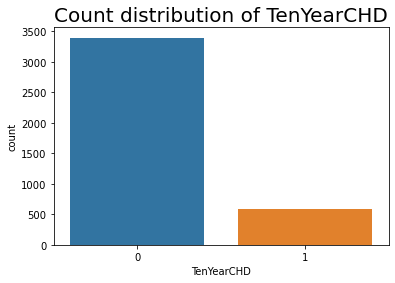

In [23]:
sns.countplot(x="TenYearCHD", data=df)
plt.title("Count distribution of TenYearCHD", size=20)

The distribution is highly imbalanced ,where negative cases outweigh the number of positive cases.This affects the  model. 

#### BIVARIATE ANALYSIS: 

#### which agegroup has more smokers?

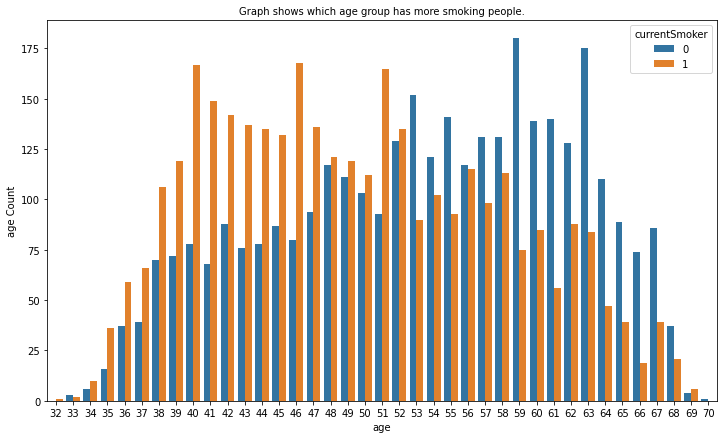

In [68]:
plt.figure(figsize=(12,7))
sns.countplot(x="age",data=df,hue="currentSmoker")
plt.title("Graph shows which age group has more smoking people.", size=10)
plt.xlabel("age", size=10)
plt.ylabel("age Count", size=10)
plt.show()

No Cuurent smoker observed below age 32

Max age for CurrentSmoker is 70

Mid range age ie 38-46 have more number of smokers

#### which gender has more affect of CHD?

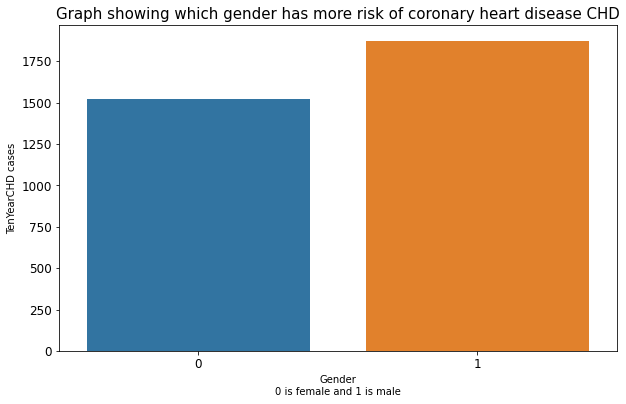

In [69]:
fig = df.groupby("male", as_index=False).TenYearCHD.sum()
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(x=fig["male"], y=fig["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=15)
plt.xlabel("Gender\n0 is female and 1 is male",size=10)
plt.ylabel("TenYearCHD cases", size=10)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Males have slightly higher risk of CHD.

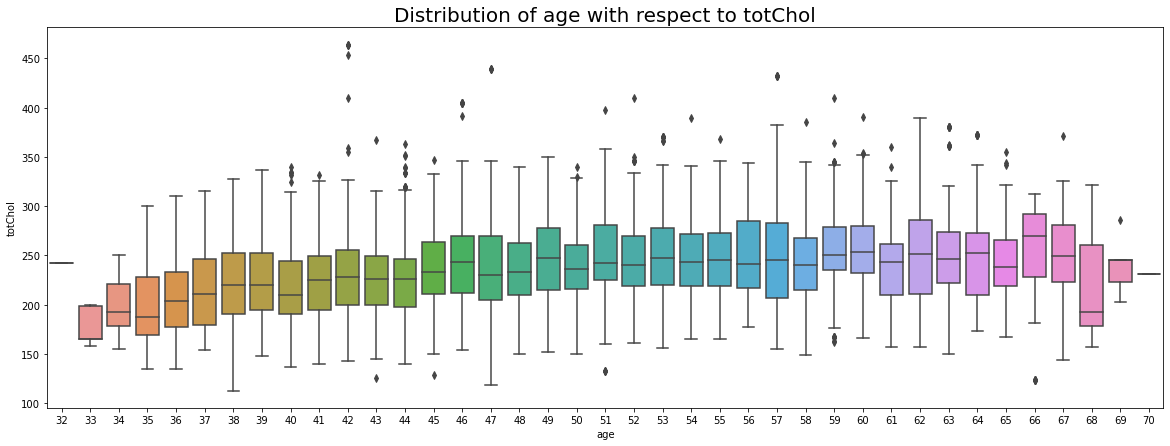

In [59]:
#relation between age and cholestrol
plt.figure(figsize=(20,7), facecolor='w')
sns.boxplot(x="age",y="totChol",data=df)
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

This boxplot defines that aged people have mpre CHOLESTROL( BAD CHOLESTROL).

#### Relation between CHD and cigsPerDay ? 

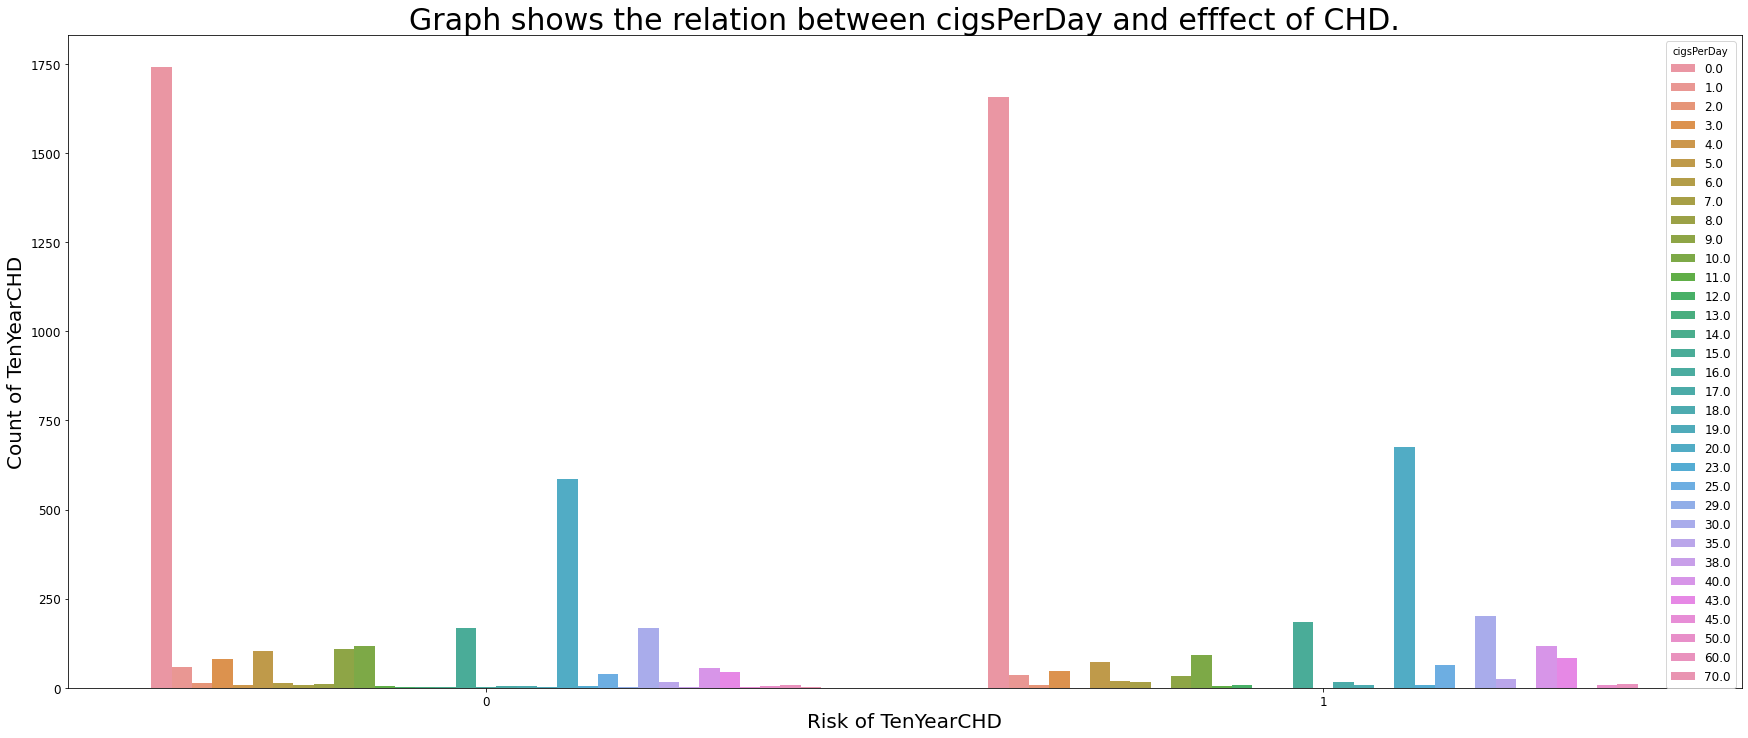

In [65]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph shows the relation between cigsPerDay and efffect of CHD.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

>1)Those who dont smoke have lower risk of infecting with CHD                                                                   
>2)Low cigsPerDay comes with lower risk of CHD.

Text(0.5, 1.0, 'Graph showing totChol,Glucose and cigsPerDay in every age group.')

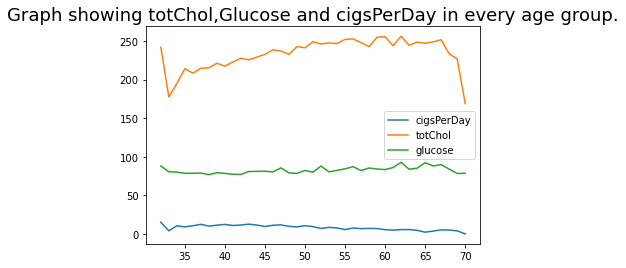

In [72]:
fig1=df.groupby("age").cigsPerDay.mean()
fig2=df.groupby("age").totChol.mean()
fig3=df.groupby("age").glucose.mean()
sns.lineplot(data=fig1, label="cigsPerDay")
sns.lineplot(data=fig2, label="totChol")
sns.lineplot(data=fig3, label="glucose")
plt.title("Graph showing totChol,Glucose and cigsPerDay in every age group.", size=18)

> 1)cigsperday have parallel relation with age                                                                              
> 2)totChol has a steep, linear and inverse graph for lower ranges of age

#### Resampling the positive cases because of imbalance data set using oversampling technique

In [26]:
target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0]

In [71]:
#for resampling the dataset
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])


In [28]:
df=target
df.shape

(6788, 16)

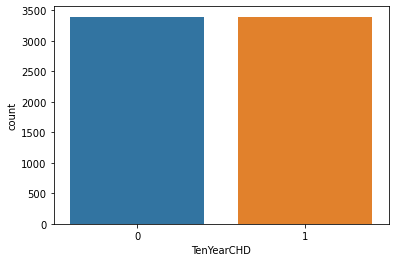

In [29]:
sns.countplot(x="TenYearCHD", data=df)
plt.show()

The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

# FEATURE SELECTION

In [30]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']


In [31]:

best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)


In [32]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
scores=pd.concat([df_columns,df_scores],axis=1)
scores.columns=['Feature','Score']
scores

,Feature,Score
0,male,66.775610
1,age,1006.482991
2,education,13.048337
3,currentSmoker,2.133156
4,cigsPerDay,788.788750
5,BPMeds,66.216216
6,prevalentStroke,11.792453
7,prevalentHyp,221.104823
8,diabetes,54.258065
9,totChol,769.066248


In [33]:
scores.nlargest(11,'Score')

,Feature,Score
10,sysBP,2121.922128
14,glucose,1232.342416
1,age,1006.482991
4,cigsPerDay,788.788750
9,totChol,769.066248
11,diaBP,486.662514
7,prevalentHyp,221.104823
0,male,66.775610
5,BPMeds,66.216216
8,diabetes,54.258065


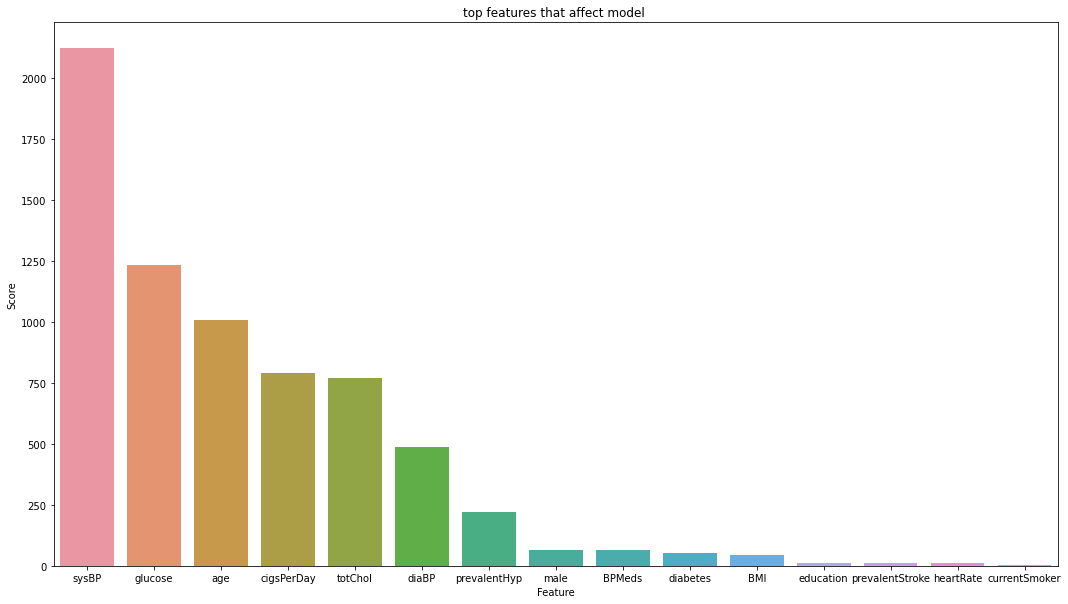

In [34]:
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(18,10))
plt.title('top features that affect model ')
sns.barplot(x='Feature',y='Score',data=scores)
plt.show()

In [35]:
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'male',
 'BPMeds',
 'diabetes']

In [36]:
df_1=df[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
df_1

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1195,145.5,67.0,62,20.0,270.0,87.5,1,1,0.0,0,1
1691,169.0,79.0,64,0.0,372.0,85.0,1,0,0.0,0,1
2041,157.0,148.0,68,0.0,184.0,97.0,1,1,0.0,1,1
2404,125.0,73.0,51,15.0,220.0,82.0,0,1,0.0,0,1


### SPLITTING AND FEATURE SCALING

In [37]:
X=df_1.drop(['TenYearCHD'],axis=1)
y=df_1.TenYearCHD

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [39]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN 

In [40]:

knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
KNN_Conf_Matrix=confusion_matrix(y_test, knn_predict)

KNN_acc_score=accuracy_score(y_test,knn_predict)
print('accuracy:',KNN_acc_score)
print(KNN_Conf_Matrix)
print(classification_report(y_test,knn_predict))

accuracy: 0.8998527245949927
[[1106  246]
 [  26 1338]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1352
           1       0.84      0.98      0.91      1364

    accuracy                           0.90      2716
   macro avg       0.91      0.90      0.90      2716
weighted avg       0.91      0.90      0.90      2716



# Random Forest Classifier

In [41]:

Rf=RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
Rf.fit(X_train,y_train)
Rf_pred=Rf.predict(X_test)
RF_acc=accuracy_score(y_test,Rf_pred)
RF_conf_matrix=confusion_matrix(y_test,Rf_pred)
print('accuracy:',RF_acc)
print(RF_conf_matrix)
print(classification_report(y_test,Rf_pred))

accuracy: 0.9039027982326951
[[1140  212]
 [  49 1315]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1352
           1       0.86      0.96      0.91      1364

    accuracy                           0.90      2716
   macro avg       0.91      0.90      0.90      2716
weighted avg       0.91      0.90      0.90      2716



# Decision Tree

In [42]:

DT=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth = 30)
DT.fit(X_train,y_train)
DT_pred=DT.predict(X_test)
DT_acc=accuracy_score(y_test,DT_pred)
DT_conf_matrix=confusion_matrix(y_test,DT_pred)
print('accuracy:',DT_acc)
print(DT_conf_matrix)
print(classification_report(y_test,DT_pred))


accuracy: 0.882179675994109
[[1066  286]
 [  34 1330]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1352
           1       0.82      0.98      0.89      1364

    accuracy                           0.88      2716
   macro avg       0.90      0.88      0.88      2716
weighted avg       0.90      0.88      0.88      2716



# Logistic Regression

In [43]:

Lr=LogisticRegression(random_state=1,max_iter=1000)
Lr.fit(X_train,y_train)
Lr_pred=Lr.predict(X_test)
Lr_acc=accuracy_score(y_test,Lr_pred)
Lr_conf_matrix=confusion_matrix(y_test,Lr_pred)
print('accuracy:',Lr_acc)
print(Lr_conf_matrix)
print(classification_report(y_test,Lr_pred))


accuracy: 0.6756259204712813
[[879 473]
 [408 956]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1352
           1       0.67      0.70      0.68      1364

    accuracy                           0.68      2716
   macro avg       0.68      0.68      0.68      2716
weighted avg       0.68      0.68      0.68      2716



# Hyperparameter Tuning 

### Random Forest Classifier

In [45]:
n_estimators=[int(x) for x in np.linspace(200,2000,10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10,110,11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
RF=RandomForestClassifier()
RF_random=RandomizedSearchCV(estimator = RF, 
                               param_distributions = grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=7,n_jobs = -1)
RF_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [47]:
RF_hy=RF_random.best_estimator_
RF_hy.fit(X_train,y_train)
print("Accuracy on training   : {}".format(RF_hy.score(X_train,y_train)))
print("Accuracy on validation : {}".format(RF_hy.score(X_test, y_test)))
RF_hy_pred=RF_hy.predict(X_test)
RF_hy_acc=accuracy_score(y_test,RF_hy_pred)
print('Accuracy after Hyperparamter Tunung',RF_hy_acc*100)
print(classification_report(y_test, RF_hy_pred))

Accuracy on training   : 1.0
Accuracy on validation : 0.9572901325478645
Accuracy after Hyperparamter Tunung 95.72901325478645
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1352
           1       0.94      0.98      0.96      1364

    accuracy                           0.96      2716
   macro avg       0.96      0.96      0.96      2716
weighted avg       0.96      0.96      0.96      2716

